In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_column',None)

In [2]:
classification_train = pd.read_csv('classification_train.csv')

In [3]:
classification_train

,Age,Gender,Income,Education level,Marital status,Past purchase history,Num past purchases,Buy a product
0,37.0,NaN,83000.0,high school,divorced,no,0.0,0
1,56.0,male,75000.0,graduate,single,no,0.0,0
2,58.0,NaN,41000.0,graduate,divorced,yes,0.0,0
3,27.0,male,41000.0,NaN,married,no,0.0,1
4,72.0,female,26000.0,high school,divorced,no,0.0,1
...,...,...,...,...,...,...,...,...
995,74.0,NaN,NaN,graduate,single,yes,3.0,0
996,70.0,male,53000.0,high school,single,yes,2.0,1
997,33.0,male,93000.0,college,divorced,yes,1.0,0
998,60.0,female,81000.0,graduate,married,NaN,1.0,1


In [4]:
classification_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    908 non-null    float64
 1   Gender                 888 non-null    object 
 2   Income                 905 non-null    float64
 3   Education level        900 non-null    object 
 4   Marital status         892 non-null    object 
 5   Past purchase history  903 non-null    object 
 6   Num past purchases     896 non-null    float64
 7   Buy a product          1000 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [5]:
classification_train.describe()

,Age,Income,Num past purchases,Buy a product
count,908.000000,905.000000,896.000000,1000.000000
mean,98.185022,61163.535912,1.208705,0.504000
std,211.333074,22940.616796,1.709641,0.500234
min,18.000000,20000.000000,0.000000,0.000000
25%,34.000000,41000.000000,0.000000,0.000000
50%,51.000000,61000.000000,0.000000,1.000000
75%,68.000000,80000.000000,2.000000,1.000000
max,999.000000,100000.000000,5.000000,1.000000


In [6]:
classification_train.isna().sum()

Age                       92
Gender                   112
Income                    95
Education level          100
Marital status           108
Past purchase history     97
Num past purchases       104
Buy a product              0
dtype: int64

In [7]:
classification_train['Age'].describe()

count    908.000000
mean      98.185022
std      211.333074
min       18.000000
25%       34.000000
50%       51.000000
75%       68.000000
max      999.000000
Name: Age, dtype: float64

In [8]:
classification_train['Age'].isna().sum()

92

In [9]:
classification_train.loc[(classification_train['Age'] < 0) | (classification_train['Age'] > 100), 'Age'] = np.nan

In [10]:
classification_train['Age'].isna().sum()

139

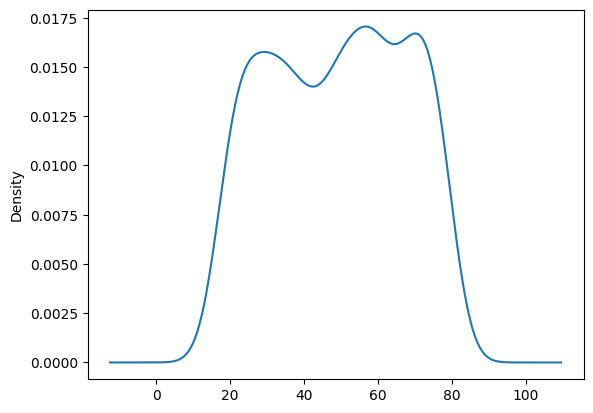

In [11]:
plot = classification_train['Age'].plot(kind = 'kde')

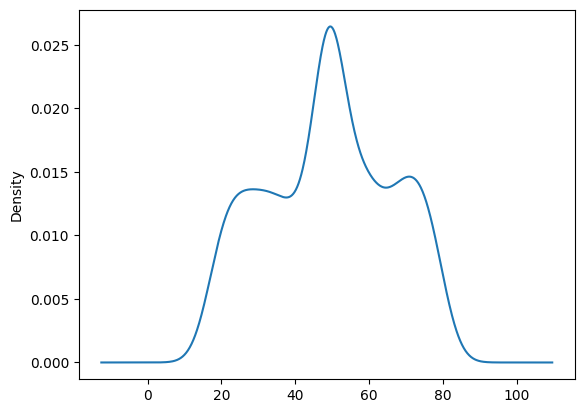

In [12]:
#Fill missing values of Age column by mean value
classification_train['Age'].fillna(classification_train['Age'].mean(),inplace=True)
plot = classification_train['Age'].plot(kind = 'kde')

In [13]:
classification_train['Age'].isna().sum()

0

In [14]:
classification_train['Gender'].value_counts()

male      457
female    431
Name: Gender, dtype: int64

In [15]:
classification_train['Gender'].isna().sum()

112

In [16]:
#Fill missing values of Gender column by mode
classification_train['Gender'].fillna(classification_train['Gender'].mode()[0],inplace=True)

In [17]:
classification_train['Gender'].isna().sum()

0

In [18]:
classification_train['Gender'] = classification_train['Gender'].map({'male':1,'female':0})

In [19]:
classification_train

,Age,Gender,Income,Education level,Marital status,Past purchase history,Num past purchases,Buy a product
0,37.0,1,83000.0,high school,divorced,no,0.0,0
1,56.0,1,75000.0,graduate,single,no,0.0,0
2,58.0,1,41000.0,graduate,divorced,yes,0.0,0
3,27.0,1,41000.0,NaN,married,no,0.0,1
4,72.0,0,26000.0,high school,divorced,no,0.0,1
...,...,...,...,...,...,...,...,...
995,74.0,1,NaN,graduate,single,yes,3.0,0
996,70.0,1,53000.0,high school,single,yes,2.0,1
997,33.0,1,93000.0,college,divorced,yes,1.0,0
998,60.0,0,81000.0,graduate,married,NaN,1.0,1


In [20]:
classification_train['Income'].describe()

count       905.000000
mean      61163.535912
std       22940.616796
min       20000.000000
25%       41000.000000
50%       61000.000000
75%       80000.000000
max      100000.000000
Name: Income, dtype: float64

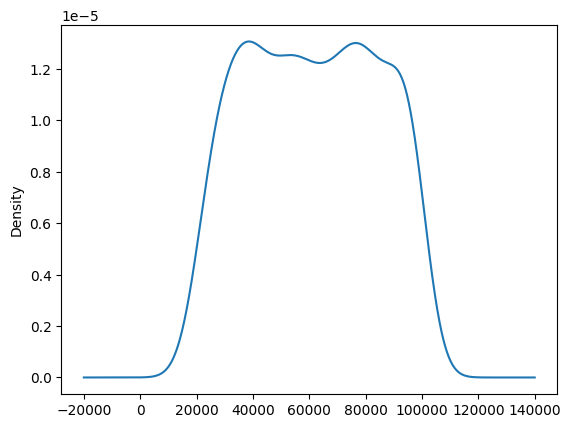

In [21]:
plot = classification_train['Income'].plot(kind='kde')

In [22]:
classification_train['Income'].isna().sum()

95

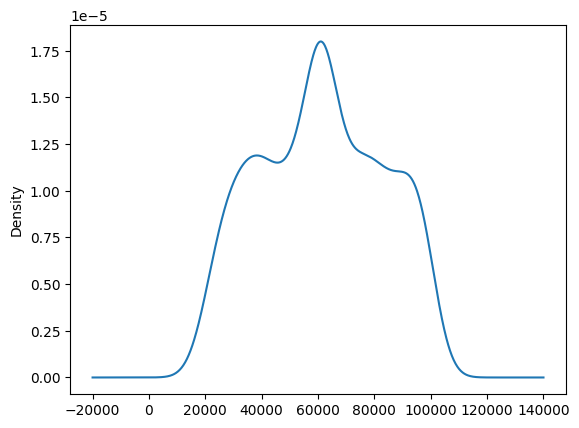

In [23]:
#Fill missing values of income column by mean value
classification_train['Income'].fillna(classification_train['Income'].mean(),inplace=True)
plot = classification_train['Income'].plot(kind='kde')

In [24]:
classification_train['Income'].isna().sum()

0

In [25]:
classification_train

,Age,Gender,Income,Education level,Marital status,Past purchase history,Num past purchases,Buy a product
0,37.0,1,83000.000000,high school,divorced,no,0.0,0
1,56.0,1,75000.000000,graduate,single,no,0.0,0
2,58.0,1,41000.000000,graduate,divorced,yes,0.0,0
3,27.0,1,41000.000000,NaN,married,no,0.0,1
4,72.0,0,26000.000000,high school,divorced,no,0.0,1
...,...,...,...,...,...,...,...,...
995,74.0,1,61163.535912,graduate,single,yes,3.0,0
996,70.0,1,53000.000000,high school,single,yes,2.0,1
997,33.0,1,93000.000000,college,divorced,yes,1.0,0
998,60.0,0,81000.000000,graduate,married,NaN,1.0,1


In [26]:
classification_train['Education level'].value_counts()

graduate       302
high school    299
college        299
Name: Education level, dtype: int64

In [27]:
#Fill missing values of Education level column by taking mode
classification_train['Education level'].fillna(classification_train['Education level'].mode()[0],inplace=True)

In [28]:
classification_train['Education level'].isna().sum()

0

In [29]:
Education_level = pd.get_dummies(classification_train['Education level'])
classification_train = pd.concat([classification_train, Education_level], axis=1)
classification_train.drop('Education level',axis=1,inplace=True)
classification_train

,Age,Gender,Income,Marital status,Past purchase history,Num past purchases,Buy a product,college,graduate,high school
0,37.0,1,83000.000000,divorced,no,0.0,0,0,0,1
1,56.0,1,75000.000000,single,no,0.0,0,0,1,0
2,58.0,1,41000.000000,divorced,yes,0.0,0,0,1,0
3,27.0,1,41000.000000,married,no,0.0,1,0,1,0
4,72.0,0,26000.000000,divorced,no,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,74.0,1,61163.535912,single,yes,3.0,0,0,1,0
996,70.0,1,53000.000000,single,yes,2.0,1,0,0,1
997,33.0,1,93000.000000,divorced,yes,1.0,0,1,0,0
998,60.0,0,81000.000000,married,NaN,1.0,1,0,1,0


In [30]:
classification_train['Marital status'].value_counts()

single      305
divorced    299
married     288
Name: Marital status, dtype: int64

In [31]:
#Fill missing values of Marital status column by mode value
classification_train['Marital status'].fillna(classification_train['Marital status'].mode()[0],inplace=True)

In [32]:
classification_train['Marital status'].isna().sum()

0

In [33]:
Marital_one_hot = pd.get_dummies(classification_train['Marital status'])

In [34]:
classification_train = pd.concat([classification_train,Marital_one_hot],axis=1)

In [35]:
classification_train.drop('Marital status',inplace=True,axis=1)

In [36]:
classification_train

,Age,Gender,Income,Past purchase history,Num past purchases,Buy a product,college,graduate,high school,divorced,married,single
0,37.0,1,83000.000000,no,0.0,0,0,0,1,1,0,0
1,56.0,1,75000.000000,no,0.0,0,0,1,0,0,0,1
2,58.0,1,41000.000000,yes,0.0,0,0,1,0,1,0,0
3,27.0,1,41000.000000,no,0.0,1,0,1,0,0,1,0
4,72.0,0,26000.000000,no,0.0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,74.0,1,61163.535912,yes,3.0,0,0,1,0,0,0,1
996,70.0,1,53000.000000,yes,2.0,1,0,0,1,0,0,1
997,33.0,1,93000.000000,yes,1.0,0,1,0,0,1,0,0
998,60.0,0,81000.000000,NaN,1.0,1,0,1,0,0,1,0


In [37]:
classification_train['Past purchase history'].value_counts()

no     452
yes    451
Name: Past purchase history, dtype: int64

In [38]:
classification_train['Past purchase history'].isna().sum()

97

In [39]:
#Fill missing values of Past purchase history by mode value
classification_train['Past purchase history'].fillna(classification_train['Past purchase history'].mode()[0],
                                                    inplace=True)

In [40]:
classification_train['Past purchase history'].isna().sum()

0

In [41]:
classification_train['Past purchase history'] = classification_train['Past purchase history'].map({'no':1,'yes':0})

In [42]:
classification_train

,Age,Gender,Income,Past purchase history,Num past purchases,Buy a product,college,graduate,high school,divorced,married,single
0,37.0,1,83000.000000,1,0.0,0,0,0,1,1,0,0
1,56.0,1,75000.000000,1,0.0,0,0,1,0,0,0,1
2,58.0,1,41000.000000,0,0.0,0,0,1,0,1,0,0
3,27.0,1,41000.000000,1,0.0,1,0,1,0,0,1,0
4,72.0,0,26000.000000,1,0.0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,74.0,1,61163.535912,0,3.0,0,0,1,0,0,0,1
996,70.0,1,53000.000000,0,2.0,1,0,0,1,0,0,1
997,33.0,1,93000.000000,0,1.0,0,1,0,0,1,0,0
998,60.0,0,81000.000000,1,1.0,1,0,1,0,0,1,0


In [43]:
classification_train['Num past purchases'].describe()

count    896.000000
mean       1.208705
std        1.709641
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: Num past purchases, dtype: float64

<AxesSubplot: ylabel='Density'>

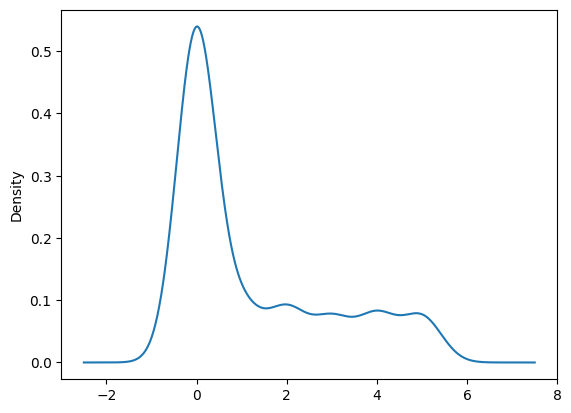

In [44]:
classification_train['Num past purchases'].plot(kind = 'kde')

<AxesSubplot: ylabel='Density'>

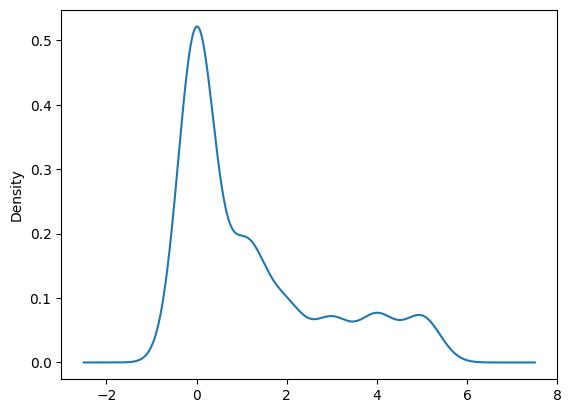

In [45]:
#Fill missing values of number of past purchases by mean value 
classification_train['Num past purchases'].fillna(classification_train['Num past purchases'].mean(),inplace=True)
classification_train['Num past purchases'].plot(kind = 'kde')

In [46]:
classification_train['Num past purchases'].isna().sum()

0

In [47]:
classification_train

,Age,Gender,Income,Past purchase history,Num past purchases,Buy a product,college,graduate,high school,divorced,married,single
0,37.0,1,83000.000000,1,0.0,0,0,0,1,1,0,0
1,56.0,1,75000.000000,1,0.0,0,0,1,0,0,0,1
2,58.0,1,41000.000000,0,0.0,0,0,1,0,1,0,0
3,27.0,1,41000.000000,1,0.0,1,0,1,0,0,1,0
4,72.0,0,26000.000000,1,0.0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,74.0,1,61163.535912,0,3.0,0,0,1,0,0,0,1
996,70.0,1,53000.000000,0,2.0,1,0,0,1,0,0,1
997,33.0,1,93000.000000,0,1.0,0,1,0,0,1,0,0
998,60.0,0,81000.000000,1,1.0,1,0,1,0,0,1,0


In [48]:
classification_train.isna().sum()

Age                      0
Gender                   0
Income                   0
Past purchase history    0
Num past purchases       0
Buy a product            0
college                  0
graduate                 0
high school              0
divorced                 0
married                  0
single                   0
dtype: int64

In [49]:
classification_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   float64
 1   Gender                 1000 non-null   int64  
 2   Income                 1000 non-null   float64
 3   Past purchase history  1000 non-null   int64  
 4   Num past purchases     1000 non-null   float64
 5   Buy a product          1000 non-null   int64  
 6   college                1000 non-null   uint8  
 7   graduate               1000 non-null   uint8  
 8   high school            1000 non-null   uint8  
 9   divorced               1000 non-null   uint8  
 10  married                1000 non-null   uint8  
 11  single                 1000 non-null   uint8  
dtypes: float64(3), int64(3), uint8(6)
memory usage: 52.9 KB


Clustering

In [50]:
# Split the dataframe into feature set X and target column y
X = classification_train.drop('Buy a product', axis=1)
Y = classification_train['Buy a product']

In [51]:
X

,Age,Gender,Income,Past purchase history,Num past purchases,college,graduate,high school,divorced,married,single
0,37.0,1,83000.000000,1,0.0,0,0,1,1,0,0
1,56.0,1,75000.000000,1,0.0,0,1,0,0,0,1
2,58.0,1,41000.000000,0,0.0,0,1,0,1,0,0
3,27.0,1,41000.000000,1,0.0,0,1,0,0,1,0
4,72.0,0,26000.000000,1,0.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,74.0,1,61163.535912,0,3.0,0,1,0,0,0,1
996,70.0,1,53000.000000,0,2.0,0,0,1,0,0,1
997,33.0,1,93000.000000,0,1.0,1,0,0,1,0,0
998,60.0,0,81000.000000,1,1.0,0,1,0,0,1,0


In [52]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaling
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [53]:
X_scaled

,Age,Gender,Income,Past purchase history,Num past purchases,college,graduate,high school,divorced,married,single
0,0.311475,1.0,0.787500,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.622951,1.0,0.687500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.655738,1.0,0.262500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.147541,1.0,0.262500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.885246,0.0,0.075000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.918033,1.0,0.514544,0.0,0.6,0.0,1.0,0.0,0.0,0.0,1.0
996,0.852459,1.0,0.412500,0.0,0.4,0.0,0.0,1.0,0.0,0.0,1.0
997,0.245902,1.0,0.912500,0.0,0.2,1.0,0.0,0.0,1.0,0.0,0.0
998,0.688525,0.0,0.762500,1.0,0.2,0.0,1.0,0.0,0.0,1.0,0.0


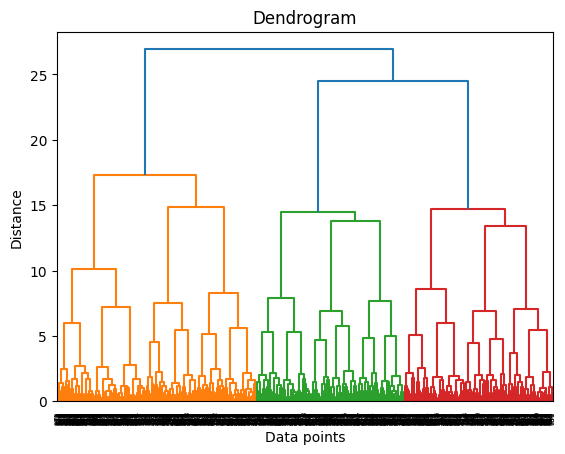

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, 'ward')
dn = dendrogram(Z)

plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In [55]:
#Performing AgglomerativeClustering with Ward by running trial and error method 
model = AgglomerativeClustering(distance_threshold = 20, n_clusters = None, 
                                linkage = 'ward')
model = model.fit(X_scaled)

In [56]:
#Cluster Value Counts
labels= model.labels_
value_countss = pd.Series(labels).value_counts()
value_countss

0    402
1    299
2    299
dtype: int64

In [57]:
#Loading Cluster wise Data, Repeat for other clusters
cluster0_data = X_scaled[model.labels_ == 0]
cluster0_data

,Age,Gender,Income,Past purchase history,Num past purchases,college,graduate,high school,divorced,married,single
1,0.622951,1.0,0.687500,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
2,0.655738,1.0,0.262500,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
3,0.147541,1.0,0.262500,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
14,0.098361,1.0,0.987500,0.0,0.400000,0.0,1.0,0.0,1.0,0.0,0.0
15,0.967213,0.0,0.962500,0.0,0.241741,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
990,0.655738,0.0,0.450000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
991,0.508387,1.0,0.687500,0.0,0.800000,0.0,1.0,0.0,0.0,1.0,0.0
994,0.918033,1.0,0.514544,0.0,1.000000,0.0,1.0,0.0,0.0,1.0,0.0
995,0.918033,1.0,0.514544,0.0,0.600000,0.0,1.0,0.0,0.0,0.0,1.0


In [58]:
value_counts_dict = {}


for col in cluster0_data.columns:

    value_counts = cluster0_data[col].value_counts()

    value_counts_dict[col] = value_counts

for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column {col}:")
    print(value_counts)

Value counts for column Age:
0.508387    52
0.672131    12
0.590164    11
0.016393     9
1.000000     8
            ..
0.754098     3
0.934426     2
0.229508     2
0.491803     2
0.819672     2
Name: Age, Length: 62, dtype: int64
Value counts for column Gender:
1.0    232
0.0    170
Name: Gender, dtype: int64
Value counts for column Income:
0.514544    37
0.450000    10
0.762500     9
0.162500     9
0.962500     8
            ..
0.050000     2
0.875000     2
0.075000     1
0.387500     1
0.000000     1
Name: Income, Length: 82, dtype: int64
Value counts for column Past purchase history:
1.0    226
0.0    176
Name: Past purchase history, dtype: int64
Value counts for column Num past purchases:
0.000000    215
0.241741     46
0.200000     34
0.400000     30
0.600000     29
1.000000     25
0.800000     23
Name: Num past purchases, dtype: int64
Value counts for column college:
0.0    402
Name: college, dtype: int64
Value counts for column graduate:
1.0    402
Name: graduate, dtype: int64
V

In [59]:
cluster1_data = X_scaled[model.labels_==1]
cluster1_data

,Age,Gender,Income,Past purchase history,Num past purchases,college,graduate,high school,divorced,married,single
0,0.311475,1.0,0.787500,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.885246,0.0,0.075000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,0.508197,0.0,0.412500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.442623,1.0,0.514544,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10,0.508387,1.0,0.400000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
969,0.852459,0.0,0.575000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
975,0.524590,0.0,0.387500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
982,0.803279,0.0,0.487500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.852459,1.0,0.412500,0.0,0.4,0.0,0.0,1.0,0.0,0.0,1.0


In [60]:
value_counts_dict = {}
for col in cluster1_data.columns:

    value_counts = cluster1_data[col].value_counts()

    value_counts_dict[col] = value_counts

for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column {col}:")
    print(value_counts)

Value counts for column Age:
0.508387    39
0.262295    11
0.852459    11
0.524590     9
0.901639     8
            ..
0.754098     1
0.245902     1
0.622951     1
0.049180     1
0.393443     1
Name: Age, Length: 62, dtype: int64
Value counts for column Gender:
1.0    173
0.0    126
Name: Gender, dtype: int64
Value counts for column Income:
0.514544    29
0.462500     7
0.412500     6
0.087500     6
0.625000     6
            ..
0.762500     1
0.475000     1
0.225000     1
1.000000     1
0.162500     1
Name: Income, Length: 82, dtype: int64
Value counts for column Past purchase history:
1.0    171
0.0    128
Name: Past purchase history, dtype: int64
Value counts for column Num past purchases:
0.000000    159
0.241741     32
1.000000     26
0.200000     26
0.400000     25
0.600000     17
0.800000     14
Name: Num past purchases, dtype: int64
Value counts for column college:
0.0    299
Name: college, dtype: int64
Value counts for column graduate:
0.0    299
Name: graduate, dtype: int64
V

In [61]:
cluster2_data = X_scaled[model.labels_==2]
cluster2_data

,Age,Gender,Income,Past purchase history,Num past purchases,college,graduate,high school,divorced,married,single
5,0.655738,1.0,0.325000,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0
7,0.508387,1.0,0.300000,0.0,0.800000,1.0,0.0,0.0,0.0,1.0,0.0
8,0.196721,0.0,0.012500,1.0,0.241741,1.0,0.0,0.0,0.0,0.0,1.0
22,0.081967,0.0,0.112500,0.0,0.400000,1.0,0.0,0.0,0.0,1.0,0.0
25,0.344262,1.0,0.737500,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
988,0.688525,0.0,0.514544,0.0,0.600000,1.0,0.0,0.0,1.0,0.0,0.0
989,0.606557,1.0,0.937500,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
992,0.377049,1.0,0.514544,0.0,0.241741,1.0,0.0,0.0,0.0,0.0,1.0
993,0.508387,0.0,0.487500,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0


In [62]:
value_counts_dict = {}
for col in cluster2_data.columns:

    value_counts = cluster2_data[col].value_counts()

    value_counts_dict[col] = value_counts

for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column {col}:")
    print(value_counts)

Value counts for column Age:
0.508387    48
0.688525    10
0.934426     8
0.885246     8
0.901639     8
            ..
0.557377     2
0.770492     2
0.786885     1
0.918033     1
0.836066     1
Name: Age, Length: 61, dtype: int64
Value counts for column Gender:
1.0    164
0.0    135
Name: Gender, dtype: int64
Value counts for column Income:
0.514544    29
0.712500     9
0.187500     8
0.075000     8
0.737500     7
            ..
0.500000     1
0.825000     1
0.637500     1
0.612500     1
0.575000     1
Name: Income, Length: 80, dtype: int64
Value counts for column Past purchase history:
1.0    152
0.0    147
Name: Past purchase history, dtype: int64
Value counts for column Num past purchases:
0.000000    152
0.800000     35
0.241741     26
0.400000     26
1.000000     20
0.600000     20
0.200000     20
Name: Num past purchases, dtype: int64
Value counts for column college:
1.0    299
Name: college, dtype: int64
Value counts for column graduate:
0.0    299
Name: graduate, dtype: int64
V

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
labels = kmeans.labels_
print(pd.Series(labels).value_counts())

C:\Users\rosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    402
2    299
1    299
dtype: int64


In [64]:
#Loading Cluster wise Data, Repeat for other clusters
Kmeanscluster0_data = X_scaled[kmeans.labels_ == 0]
Kmeanscluster1_data = X_scaled[kmeans.labels_ == 1]
Kmeanscluster2_data = X_scaled[kmeans.labels_ == 2]

In [65]:
Kmeanscluster0_data

,Age,Gender,Income,Past purchase history,Num past purchases,college,graduate,high school,divorced,married,single
1,0.622951,1.0,0.687500,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
2,0.655738,1.0,0.262500,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
3,0.147541,1.0,0.262500,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
14,0.098361,1.0,0.987500,0.0,0.400000,0.0,1.0,0.0,1.0,0.0,0.0
15,0.967213,0.0,0.962500,0.0,0.241741,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
990,0.655738,0.0,0.450000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
991,0.508387,1.0,0.687500,0.0,0.800000,0.0,1.0,0.0,0.0,1.0,0.0
994,0.918033,1.0,0.514544,0.0,1.000000,0.0,1.0,0.0,0.0,1.0,0.0
995,0.918033,1.0,0.514544,0.0,0.600000,0.0,1.0,0.0,0.0,0.0,1.0


In [66]:
value_counts_dict = {}

# loop through the columns in cluster0_data
for col in Kmeanscluster0_data.columns:

    # get the value counts for the current column
    value_counts = Kmeanscluster0_data[col].value_counts()

    # add the value counts to the dictionary
    value_counts_dict[col] = value_counts

# print the value counts for each column
for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column {col}:")
    print(value_counts)

Value counts for column Age:
0.508387    52
0.672131    12
0.590164    11
0.016393     9
1.000000     8
            ..
0.754098     3
0.934426     2
0.229508     2
0.491803     2
0.819672     2
Name: Age, Length: 62, dtype: int64
Value counts for column Gender:
1.0    232
0.0    170
Name: Gender, dtype: int64
Value counts for column Income:
0.514544    37
0.450000    10
0.762500     9
0.162500     9
0.962500     8
            ..
0.050000     2
0.875000     2
0.075000     1
0.387500     1
0.000000     1
Name: Income, Length: 82, dtype: int64
Value counts for column Past purchase history:
1.0    226
0.0    176
Name: Past purchase history, dtype: int64
Value counts for column Num past purchases:
0.000000    215
0.241741     46
0.200000     34
0.400000     30
0.600000     29
1.000000     25
0.800000     23
Name: Num past purchases, dtype: int64
Value counts for column college:
0.0    402
Name: college, dtype: int64
Value counts for column graduate:
1.0    402
Name: graduate, dtype: int64
V

In [67]:
value_counts_dict = {}

# loop through the columns in cluster0_data
for col in Kmeanscluster1_data.columns:

    # get the value counts for the current column
    value_counts = Kmeanscluster1_data[col].value_counts()

    # add the value counts to the dictionary
    value_counts_dict[col] = value_counts

# print the value counts for each column
for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column {col}:")
    print(value_counts)

Value counts for column Age:
0.508387    48
0.688525    10
0.934426     8
0.885246     8
0.901639     8
            ..
0.557377     2
0.770492     2
0.786885     1
0.918033     1
0.836066     1
Name: Age, Length: 61, dtype: int64
Value counts for column Gender:
1.0    164
0.0    135
Name: Gender, dtype: int64
Value counts for column Income:
0.514544    29
0.712500     9
0.187500     8
0.075000     8
0.737500     7
            ..
0.500000     1
0.825000     1
0.637500     1
0.612500     1
0.575000     1
Name: Income, Length: 80, dtype: int64
Value counts for column Past purchase history:
1.0    152
0.0    147
Name: Past purchase history, dtype: int64
Value counts for column Num past purchases:
0.000000    152
0.800000     35
0.241741     26
0.400000     26
1.000000     20
0.600000     20
0.200000     20
Name: Num past purchases, dtype: int64
Value counts for column college:
1.0    299
Name: college, dtype: int64
Value counts for column graduate:
0.0    299
Name: graduate, dtype: int64
V

In [68]:
value_counts_dict = {}

# loop through the columns in cluster0_data
for col in Kmeanscluster2_data.columns:

    # get the value counts for the current column
    value_counts = Kmeanscluster2_data[col].value_counts()

    # add the value counts to the dictionary
    value_counts_dict[col] = value_counts

# print the value counts for each column
for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column {col}:")
    print(value_counts)

Value counts for column Age:
0.508387    39
0.262295    11
0.852459    11
0.524590     9
0.901639     8
            ..
0.754098     1
0.245902     1
0.622951     1
0.049180     1
0.393443     1
Name: Age, Length: 62, dtype: int64
Value counts for column Gender:
1.0    173
0.0    126
Name: Gender, dtype: int64
Value counts for column Income:
0.514544    29
0.462500     7
0.412500     6
0.087500     6
0.625000     6
            ..
0.762500     1
0.475000     1
0.225000     1
1.000000     1
0.162500     1
Name: Income, Length: 82, dtype: int64
Value counts for column Past purchase history:
1.0    171
0.0    128
Name: Past purchase history, dtype: int64
Value counts for column Num past purchases:
0.000000    159
0.241741     32
1.000000     26
0.200000     26
0.400000     25
0.600000     17
0.800000     14
Name: Num past purchases, dtype: int64
Value counts for column college:
0.0    299
Name: college, dtype: int64
Value counts for column graduate:
0.0    299
Name: graduate, dtype: int64
V

Splitting and models

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=0)

In [72]:
X_train.head(10)

,Age,Gender,Income,Past purchase history,Num past purchases,college,graduate,high school,divorced,married,single
253,0.327869,0.0,0.514544,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
667,0.540984,1.0,0.325000,1.0,0.241741,0.0,1.0,0.0,0.0,1.0,0.0
85,0.114754,0.0,0.287500,1.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
969,0.852459,0.0,0.575000,1.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
75,0.098361,0.0,0.887500,0.0,0.600000,0.0,0.0,1.0,0.0,0.0,1.0
786,0.672131,1.0,0.762500,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
658,0.508387,1.0,0.887500,0.0,0.600000,0.0,1.0,0.0,1.0,0.0,0.0
465,0.032787,1.0,0.514544,0.0,0.200000,0.0,1.0,0.0,0.0,1.0,0.0
920,0.442623,1.0,0.862500,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
38,0.016393,1.0,0.800000,1.0,0.241741,0.0,0.0,1.0,1.0,0.0,0.0
